<a href="https://colab.research.google.com/github/aasrithanarra/AasrithaNarra_HealtharePrediction.ipynb/blob/main/Healthcare_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report,confusion_matrix,precision_score,recall_score,roc_curve,auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [13]:
info = pd.read_csv('/content/health care diabetes.csv')
info.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
info.shape

(768, 9)

In [15]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
info.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
print(info['Glucose'].median())
print(info['BloodPressure'].median())
print(info['SkinThickness'].median())
print(info['Insulin'].median())

117.0
72.0
23.0
30.5


In [18]:
print('Glucose-', len(info['Glucose'][info['Glucose']==0]))
print('BloodPressure-', len(info['BloodPressure'][info['BloodPressure']==0]))
print('SkinThickness-', len(info['SkinThickness'][info['SkinThickness']==0]))
print('Insulin-', len(info['Insulin'][info['Insulin']==0]))

Glucose- 5
BloodPressure- 35
SkinThickness- 227
Insulin- 374


In [19]:
chosen_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
empty_percentage = (info[chosen_columns] == 0).mean() * 100
print("Percentage of Empty Values for Each Column:")
print(empty_percentage)

Percentage of Empty Values for Each Column:
Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
dtype: float64


In [20]:
info['Glucose'] = info['Glucose'].replace([0], [info['Glucose'].median()])
info['BloodPressure'] = info['BloodPressure'].replace([0], [info['BloodPressure'].median()])
info['SkinThickness'] = info['SkinThickness'].replace([0], [info['SkinThickness'].median()])
info['Insulin'] = info['Insulin'].replace([0], [info['Insulin'].median()])

In [27]:
null_percentage_treated = (info[chosen_columns] == 0).mean() * 100
print("Percentage of Null Values for Each Column after the null value treatment:")
print(null_percentage_treated)

Percentage of Null Values for Each Column after the null value treatment:
Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
dtype: float64


In [28]:
columns=info[chosen_columns]

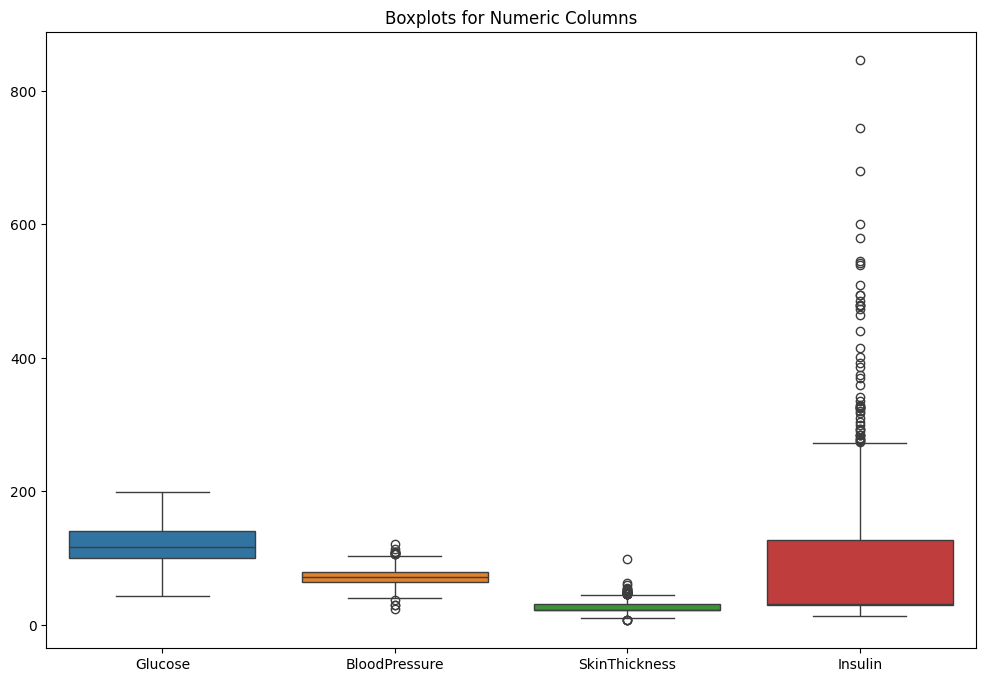

In [29]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=columns)
plt.title("Boxplots for Numeric Columns")
plt.show()

In [30]:
info.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [31]:
def detect_outliers_iqr(info, field_name):
    Q1 = info[field_name].quantile(0.25)
    Q3 = info[field_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    anomalies = info[(info[field_name] < lower_limit) | (info[field_name] > upper_limit)]
    count_anomalies = len(anomalies)
    return count_anomalies

In [32]:
for field_name in chosen_columns:
    anomaly_count = detect_outliers_iqr(info, field_name)
    print(f"Number of anomalies in the '{field_name}' column: {anomaly_count}")

Number of anomalies in the 'Glucose' column: 0
Number of anomalies in the 'BloodPressure' column: 14
Number of anomalies in the 'SkinThickness' column: 35
Number of anomalies in the 'Insulin' column: 49


In [34]:
sorted(info)
Q1 = info.quantile(0.20)
Q3 = info.quantile(0.80)
IQR = Q3 - Q1
print(IQR)

Pregnancies                   6.0000
Glucose                      52.0000
BloodPressure                20.0000
SkinThickness                12.0000
Insulin                     119.5000
BMI                          11.9000
DiabetesPedigreeFunction      0.4676
Age                          19.6000
Outcome                       1.0000
dtype: float64


In [37]:
info_cleared_iqr = info[~((info < (Q1 - 1.5 * IQR)) |(info > (Q3 + 1.5 * IQR))).any(axis=1)]
info_cleared_iqr
print(info_cleared_iqr.shape)
print(info.shape)

(701, 9)
(768, 9)


In [38]:
info_cleared_iqr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
5,5,116,74,23,30.5,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


In [40]:
col=info_cleared_iqr[['Glucose','BloodPressure','SkinThickness','Insulin']]

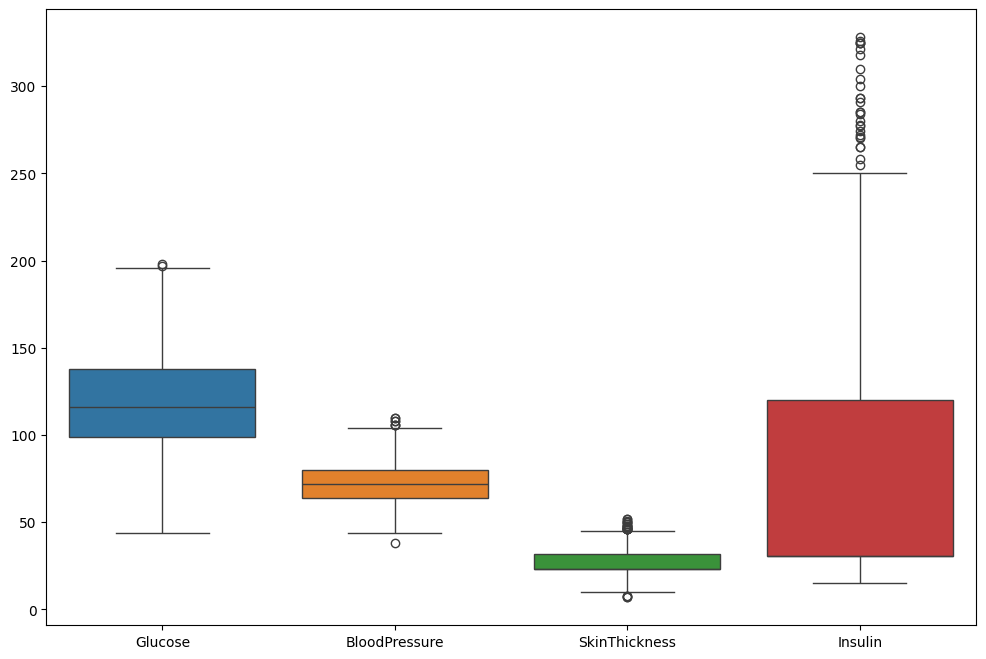

In [42]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=col)
plt.show()